In [1]:
!pip install matplotlib-venn
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155653 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 29.5 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=12196c3a4614c3ec14109b99d0e6d8d05bd58721d085c80a41d3f03743e5d5ef
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/cola

In [2]:
pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=f5b53781864f9f815c09942d58c74f552d3a70ef54ad8bdf9d97e3796cebbb08
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [6]:
import numpy as np
import pandas as pd 

from google.colab import drive

drive.mount("/content/drive")



Mounted at /content/drive


Data reading

In [ ]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline 

path = "/content/drive/MyDrive/consolidated-educational-dataset.csv"


data = pd.read_csv('/content/drive/MyDrive/consolidated-educational-dataset.csv')


print(data.head())

  % Boys Enrolled  % Complete Primary Schools % Girls Enrolled  \
0          54.77%                    0.936599           45.23%   
1          62.50%                    0.594203           37.50%   
2          86.63%                    0.939068           13.37%   
3          60.77%                    0.827225           39.23%   
4          60.75%                    0.592348           39.25%   

   % Primary Schools with single classroom  \
0                                 0.034582   
1                                 0.359903   
2                                 0.021505   
3                                 0.041885   
4                                 0.346966   

   % Primary Schools with single teacher All Four Facilities Any One Facility  \
0                               0.028818              17.06%           16.20%   
1                               0.045894              15.25%           20.21%   
2                               0.039427               5.35%            4.55%   
3 

Getting basic statistics about dataset

In [ ]:
print(data.shape)

(580, 51)


Our data contains 580 record of different schools and 51 features about each school

In [ ]:
print(data.describe())

       % Complete Primary Schools  % Primary Schools with single classroom  \
count                  576.000000                               576.000000   
mean                     0.592544                                 0.135134   
std                      0.302878                                 0.121400   
min                      0.000000                                 0.000000   
25%                      0.340517                                 0.029740   
50%                      0.691613                                 0.096157   
75%                      0.846848                                 0.211669   
max                      0.994764                                 0.514768   

       % Primary Schools with single teacher    Area (km²)  \
count                             576.000000    512.000000   
mean                                0.276365   6577.554688   
std                                 0.212211   7086.477548   
min                                 0.000000     

Printing the datatypes of columns(Features)

In [ ]:
print(data.dtypes)

% Boys Enrolled                                                                          object
% Complete Primary Schools                                                              float64
% Girls Enrolled                                                                         object
% Primary Schools with single classroom                                                 float64
% Primary Schools with single teacher                                                   float64
All Four Facilities                                                                      object
Any One Facility                                                                         object
Any Three Facilities                                                                     object
Any Two Facilities                                                                       object
Area (km²)                                                                              float64
Bomb Blasts Occurred                    

Getting to know about the different types of columns in the dataset

In [ ]:
print(data.dtypes.unique())

[dtype('O') dtype('float64') dtype('int64')]


Dataset contains three different types of columns:


1.   Object
2.   Float64
3.   int64



**Exploring the dataset**

Exploring null columns

Printing the count of Null values in columns

In [ ]:
null_columns=data.columns[data.isnull().any()]
print(data[null_columns].isnull().sum())

% Boys Enrolled                             1
% Complete Primary Schools                  4
% Girls Enrolled                            1
% Primary Schools with single classroom     4
% Primary Schools with single teacher       4
All Four Facilities                         4
Any One Facility                            4
Any Three Facilities                        4
Any Two Facilities                          4
Area (km²)                                 68
Complete Primary Schools                    4
No Facility                                 4
Population                                 68
Primary Schools with single classroom       4
Primary Schools with single teacher         4
dtype: int64


Missing value count of original dataset
1. % Boys Enrolled                             1
2. % Complete Primary Schools                  4
3. % Girls Enrolled                            1
4. % Primary Schools with single classroom     4
5. % Primary Schools with single teacher       4
6. All Four Facilities                         4
7. Any One Facility                            4
8. Any Three Facilities                        4
9. Any Two Facilities                          4
10. Area (km²)                                 68
11. Complete Primary Schools                    4
12. No Facility                                 4
13. Population                                 68
14. Primary Schools with single classroom       4
15. Primary Schools with single teacher         4

As there are a total of 580 values, above statistics represent that there are very less Null values. It means we wont be dropping any column because of null values. We will focus on imputing values in the null rows

Following are the columns containing some null values

In [ ]:
data[data.isnull().any(axis=1)][null_columns].head()

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),Complete Primary Schools,No Facility,Population,Primary Schools with single classroom,Primary Schools with single teacher
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,NaN,262.0,53.74%,NaN,6.0,11.0
7,80.78%,0.737327,19.22%,0.184332,0.078341,4.08%,25.31%,13.47%,21.22%,NaN,160.0,35.92%,NaN,40.0,17.0
40,94.20%,0.908560,5.80%,0.007782,0.083658,17.45%,23.83%,13.26%,20.97%,NaN,467.0,24.50%,NaN,4.0,43.0
42,100.00%,0.886364,0.00%,0.015152,0.098485,15.79%,26.97%,11.84%,18.42%,NaN,117.0,26.97%,NaN,2.0,13.0
43,100.00%,0.945578,0.00%,0.020408,0.034014,15.68%,28.11%,18.38%,21.08%,NaN,139.0,16.76%,NaN,3.0,5.0


A problem would generate if we start the Imputing process now because many columns contain the % sign which would have to be removed first. The problem is that they might also have Nan values and converting from string to float would generate error. So:
 1. first we will impute 0 in the place of all the Nan values. 
 2. Will remove the percent signs and convert those columns into float
 3. will replace the 0's with knn imputer values

In [ ]:
data=data.fillna(0)
data.head(3)# checking only 3 because Area contained Nan in the 3rd row which has now been replaced with 0

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),...,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,54.77%,0.936599,45.23%,0.034582,0.028818,17.06%,16.20%,24.73%,24.95%,768.0,...,351415.0,12.0,10.0,AJK,14.8,24.929178,5379,37.393768,601,2013
1,62.50%,0.594203,37.50%,0.359903,0.045894,15.25%,20.21%,17.38%,15.43%,1516.0,...,301633.0,149.0,19.0,AJK,75.2,28.883827,5379,20.728929,595,2013
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,0.0,...,0.0,6.0,11.0,AJK,0.0,22.463768,5379,43.840580,379,2013


By exploring the dataset, I found some columns that in my observation doesnt seem to be useful. So we will be dropping those columns

In [ ]:
dropColumns=['Boundary wall, Building condition satisfactory, Drinking water and 2 more (clusters)','Show Sheet','Table of Contents','Color By Measure Name','Number of Records'
             ,'MeasureGroup 1 Measures','Color By Measure Value','Other Factors Measure Value','MeasureGroup 2 Measures','Country','Analysis Level Selector']


columns=[col for col in data.columns if col not in dropColumns]


print(columns)

data=data[columns]
data



['% Boys Enrolled', '% Complete Primary Schools', '% Girls Enrolled', '% Primary Schools with single classroom', '% Primary Schools with single teacher', 'All Four Facilities', 'Any One Facility', 'Any Three Facilities', 'Any Two Facilities', 'Area (km²)', 'Bomb Blasts Occurred', 'Boundary wall', 'Building condition satisfactory', 'Complete Primary Schools', 'City', 'Drinking water', 'Drone attacks in Pakistan', 'Education score', 'Educational Budget Spend of GDP', 'Electricity', 'Enrolment score', 'Gender parity score', 'Global Terrorism Index - Pakistan', 'Learning score', 'No Facility', 'Number of primary schools as % of total schools', 'Number of primary schools', 'Number of secondary schools as % of total schools', 'Number of secondary schools', 'Pakistan Economic Growth', 'Population', 'Primary Schools with single classroom', 'Primary Schools with single teacher', 'Province', 'Retention score', 'School infrastructure score', 'Terrorist Attacks Affectees', 'Toilet', 'Total number 

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),...,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,54.77%,0.936599,45.23%,0.034582,0.028818,17.06%,16.20%,24.73%,24.95%,768.0,...,351415.0,12.0,10.0,AJK,14.800000,24.929178,5379,37.393768,601,2013
1,62.50%,0.594203,37.50%,0.359903,0.045894,15.25%,20.21%,17.38%,15.43%,1516.0,...,301633.0,149.0,19.0,AJK,75.200000,28.883827,5379,20.728929,595,2013
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,0.0,...,0.0,6.0,11.0,AJK,0.000000,22.463768,5379,43.840580,379,2013
3,60.77%,0.827225,39.23%,0.041885,0.130890,1.57%,22.44%,7.09%,12.20%,600.0,...,150000.0,8.0,25.0,AJK,0.000000,13.048128,5379,26.203209,262,2013
4,60.75%,0.592348,39.25%,0.346966,0.060686,7.12%,23.06%,9.78%,13.60%,2162.0,...,834094.0,263.0,46.0,AJK,73.200000,20.184453,5379,14.888011,1036,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,63.98%,0.214286,36.02%,0.215633,0.570081,31.77%,12.64%,23.71%,20.58%,5165.0,...,908373.0,160.0,423.0,Sindh,59.000000,55.390836,1803,62.533693,831,2016
576,73.89%,0.000000,26.11%,0.440000,0.743158,14.16%,22.81%,25.17%,19.08%,2310.0,...,550000.0,418.0,706.0,Sindh,43.668667,43.010526,1803,50.947368,1017,2016
577,75.73%,0.024200,24.27%,0.417585,0.558215,2.10%,15.12%,10.10%,19.79%,19638.0,...,955812.0,1553.0,2076.0,Sindh,26.000000,26.071525,1803,33.019629,4008,2016
578,71.06%,0.018284,28.94%,0.514768,0.466948,2.71%,22.57%,4.82%,25.48%,19638.0,...,914291.0,732.0,664.0,Sindh,18.000000,19.774965,1803,35.161744,1515,2016



 1. We will find the non numerical columns
 2. Among those columns we will explore the columns containing '%' sign
 3. Will remove the '%' sign and divide by 100
 4. Once this cleaning is done, we would replace the 0's with Nan and will impute missing values

1)Finding non numerical columns

In [ ]:
data2 = data.copy()
NonNumerical=[c for c in data.columns if data[c].dtype in ['O']]

print(NonNumerical)


['% Boys Enrolled', '% Girls Enrolled', 'All Four Facilities', 'Any One Facility', 'Any Three Facilities', 'Any Two Facilities', 'City', 'Educational Budget Spend of GDP', 'No Facility', 'Pakistan Economic Growth', 'Province']


In [ ]:
for i in NonNumerical:


  if(data2[i][0][-1]=='%'):

    data2[i] = data2[i].map(lambda x: str(x)[:-1]) 
    data2[i]=pd.to_numeric(data2[i],errors='coerce')
    data2[i] = data2[i]/100

In [ ]:
data = data2
print(data.head())

   % Boys Enrolled  % Complete Primary Schools  % Girls Enrolled  \
0           0.5477                    0.936599            0.4523   
1           0.6250                    0.594203            0.3750   
2           0.8663                    0.939068            0.1337   
3           0.6077                    0.827225            0.3923   
4           0.6075                    0.592348            0.3925   

   % Primary Schools with single classroom  \
0                                 0.034582   
1                                 0.359903   
2                                 0.021505   
3                                 0.041885   
4                                 0.346966   

   % Primary Schools with single teacher  All Four Facilities  \
0                               0.028818               0.1706   
1                               0.045894               0.1525   
2                               0.039427               0.0535   
3                               0.130890              

'%' sign succesfully handled. Time to perform the imputation of missing values

Replace all the 0's with Nan

In [ ]:
print(data.dtypes.unique())

[dtype('float64') dtype('int64') dtype('O')]


In [ ]:
import numpy as np
data.replace(0, np.nan, inplace=True)
data.head()

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),...,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,0.5477,0.936599,0.4523,0.034582,0.028818,0.1706,0.1620,0.2473,0.2495,768.0,...,351415.0,12.0,10.0,AJK,14.8,24.929178,5379,37.393768,601,2013
1,0.6250,0.594203,0.3750,0.359903,0.045894,0.1525,0.2021,0.1738,0.1543,1516.0,...,301633.0,149.0,19.0,AJK,75.2,28.883827,5379,20.728929,595,2013
2,0.8663,0.939068,0.1337,0.021505,0.039427,0.0535,0.0455,0.1631,0.2005,NaN,...,NaN,6.0,11.0,AJK,NaN,22.463768,5379,43.840580,379,2013
3,0.6077,0.827225,0.3923,0.041885,0.130890,0.0157,0.2244,0.0709,0.1220,600.0,...,150000.0,8.0,25.0,AJK,NaN,13.048128,5379,26.203209,262,2013
4,0.6075,0.592348,0.3925,0.346966,0.060686,0.0712,0.2306,0.0978,0.1360,2162.0,...,834094.0,263.0,46.0,AJK,73.2,20.184453,5379,14.888011,1036,2013


In [ ]:
null_columns=data.columns[data.isnull().any()]
print(data[null_columns].isnull().sum())

% Boys Enrolled                              1
% Complete Primary Schools                  32
% Girls Enrolled                            36
% Primary Schools with single classroom     24
% Primary Schools with single teacher        8
All Four Facilities                          4
Any One Facility                           152
Any Three Facilities                         4
Any Two Facilities                         144
Area (km²)                                  88
Boundary wall                                3
Building condition satisfactory              4
Complete Primary Schools                    32
Drinking water                               2
Electricity                                  1
Enrolment score                             10
Gender parity score                          1
Learning score                              10
No Facility                                272
Population                                  88
Primary Schools with single classroom       24
Primary Schoo

Impute values in columns other than the columns contatning categorical data. Removing the no facility column as it contains many null values

In [ ]:
Numerical=[c for c in data.columns if data[c].dtype not in ['O','object']]
Numerical = [c for c in Numerical if c not in ['No Facility'] ]
print(Numerical)


['% Boys Enrolled', '% Complete Primary Schools', '% Girls Enrolled', '% Primary Schools with single classroom', '% Primary Schools with single teacher', 'All Four Facilities', 'Any One Facility', 'Any Three Facilities', 'Any Two Facilities', 'Area (km²)', 'Bomb Blasts Occurred', 'Boundary wall', 'Building condition satisfactory', 'Complete Primary Schools', 'Drinking water', 'Drone attacks in Pakistan', 'Education score', 'Educational Budget Spend of GDP', 'Electricity', 'Enrolment score', 'Gender parity score', 'Global Terrorism Index - Pakistan', 'Learning score', 'Number of primary schools as % of total schools', 'Number of primary schools', 'Number of secondary schools as % of total schools', 'Number of secondary schools', 'Pakistan Economic Growth', 'Population', 'Primary Schools with single classroom', 'Primary Schools with single teacher', 'Retention score', 'School infrastructure score', 'Terrorist Attacks Affectees', 'Toilet', 'Total number of schools', 'Year']


In [ ]:
print(data[Numerical].dtypes.unique())

[dtype('float64') dtype('int64')]


In [ ]:
data[Numerical]

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),...,Pakistan Economic Growth,Population,Primary Schools with single classroom,Primary Schools with single teacher,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,0.5477,0.936599,0.4523,0.034582,0.028818,0.1706,0.1620,0.2473,0.2495,768.0,...,0.037,351415.0,12.0,10.0,14.800000,24.929178,5379,37.393768,601,2013
1,0.6250,0.594203,0.3750,0.359903,0.045894,0.1525,0.2021,0.1738,0.1543,1516.0,...,0.037,301633.0,149.0,19.0,75.200000,28.883827,5379,20.728929,595,2013
2,0.8663,0.939068,0.1337,0.021505,0.039427,0.0535,0.0455,0.1631,0.2005,NaN,...,0.037,NaN,6.0,11.0,NaN,22.463768,5379,43.840580,379,2013
3,0.6077,0.827225,0.3923,0.041885,0.130890,0.0157,0.2244,0.0709,0.1220,600.0,...,0.037,150000.0,8.0,25.0,NaN,13.048128,5379,26.203209,262,2013
4,0.6075,0.592348,0.3925,0.346966,0.060686,0.0712,0.2306,0.0978,0.1360,2162.0,...,0.037,834094.0,263.0,46.0,73.200000,20.184453,5379,14.888011,1036,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.6398,0.214286,0.3602,0.215633,0.570081,0.3177,0.1264,0.2371,0.2058,5165.0,...,0.047,908373.0,160.0,423.0,59.000000,55.390836,1803,62.533693,831,2016
576,0.7389,NaN,0.2611,0.440000,0.743158,0.1416,0.2281,0.2517,0.1908,2310.0,...,0.047,550000.0,418.0,706.0,43.668667,43.010526,1803,50.947368,1017,2016
577,0.7573,0.024200,0.2427,0.417585,0.558215,0.0210,0.1512,0.1010,0.1979,19638.0,...,0.047,955812.0,1553.0,2076.0,26.000000,26.071525,1803,33.019629,4008,2016
578,0.7106,0.018284,0.2894,0.514768,0.466948,0.0271,0.2257,0.0482,0.2548,19638.0,...,0.047,914291.0,732.0,664.0,18.000000,19.774965,1803,35.161744,1515,2016


In [ ]:
# data.to_csv (r'/content/drive/My Drive/Sem8/DS/Project/Processed(ContainsMissingValues).csv', index = False, header=True)

Imputing using ffill

In [ ]:
data[Numerical]=data[Numerical].ffill(axis = 0) 
data[Numerical]

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),...,Pakistan Economic Growth,Population,Primary Schools with single classroom,Primary Schools with single teacher,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,0.5477,0.936599,0.4523,0.034582,0.028818,0.1706,0.1620,0.2473,0.2495,768.0,...,0.037,351415.0,12.0,10.0,14.800000,24.929178,5379,37.393768,601,2013
1,0.6250,0.594203,0.3750,0.359903,0.045894,0.1525,0.2021,0.1738,0.1543,1516.0,...,0.037,301633.0,149.0,19.0,75.200000,28.883827,5379,20.728929,595,2013
2,0.8663,0.939068,0.1337,0.021505,0.039427,0.0535,0.0455,0.1631,0.2005,1516.0,...,0.037,301633.0,6.0,11.0,75.200000,22.463768,5379,43.840580,379,2013
3,0.6077,0.827225,0.3923,0.041885,0.130890,0.0157,0.2244,0.0709,0.1220,600.0,...,0.037,150000.0,8.0,25.0,75.200000,13.048128,5379,26.203209,262,2013
4,0.6075,0.592348,0.3925,0.346966,0.060686,0.0712,0.2306,0.0978,0.1360,2162.0,...,0.037,834094.0,263.0,46.0,73.200000,20.184453,5379,14.888011,1036,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.6398,0.214286,0.3602,0.215633,0.570081,0.3177,0.1264,0.2371,0.2058,5165.0,...,0.047,908373.0,160.0,423.0,59.000000,55.390836,1803,62.533693,831,2016
576,0.7389,0.214286,0.2611,0.440000,0.743158,0.1416,0.2281,0.2517,0.1908,2310.0,...,0.047,550000.0,418.0,706.0,43.668667,43.010526,1803,50.947368,1017,2016
577,0.7573,0.024200,0.2427,0.417585,0.558215,0.0210,0.1512,0.1010,0.1979,19638.0,...,0.047,955812.0,1553.0,2076.0,26.000000,26.071525,1803,33.019629,4008,2016
578,0.7106,0.018284,0.2894,0.514768,0.466948,0.0271,0.2257,0.0482,0.2548,19638.0,...,0.047,914291.0,732.0,664.0,18.000000,19.774965,1803,35.161744,1515,2016


Dropping the no facility column

In [ ]:
# dropColumns=['Boundary wall, Building condition satisfactory, Drinking water and 2 more (clusters)','Show Sheet','Table of Contents','Color By Measure Name','Number of Records']
data = data[[c for c in data.columns if c not in ['No Facility']]]

Now the data contains no null values and start visualizing the data





Imputing mean

In [ ]:
"""
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data[Numerical]=imp_mean.fit_transform(data[Numerical])
data[Numerical]
"""

"\nfrom sklearn.impute import SimpleImputer\nimp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')\ndata[Numerical]=imp_mean.fit_transform(data[Numerical])\ndata[Numerical]\n"

Imputing mean didnt seem to be a good option as the population seemed unrealistic

Imputing missing values using knn imputer

In [ ]:
"""
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

data[Numerical] = imputer.fit_transform(data[Numerical])
data[Numerical]

"""



'\nfrom sklearn.impute import KNNImputer\n\nimputer = KNNImputer(n_neighbors=5)\n\ndata[Numerical] = imputer.fit_transform(data[Numerical])\ndata[Numerical]\n\n'

KNN imputer doesnt seem to be a suitable choice for the dataset, the dataset processed with it is saved in the directory

We have data from following cities

In [ ]:
print('Cities belong to the following areas:\n\nAzad Jammu Kashmir(AJK), Balochistan, Federally Administered Tribal Areas(FATA),\nGilgit Baltistan(GB), Khyber Pakhtunkhwa(KP), Islamabd Capital Territory(ICT), Punjab, Sindh: ')
print(data.Province.unique())

print('\nData Collected of following cities:\n')
c=5
for i in data.City.unique():
  if(c==10):
    print()
    c=0
  print(i, end =", ")
  c+=1

Cities belong to the following areas:

Azad Jammu Kashmir(AJK), Balochistan, Federally Administered Tribal Areas(FATA),
Gilgit Baltistan(GB), Khyber Pakhtunkhwa(KP), Islamabd Capital Territory(ICT), Punjab, Sindh: 
['AJK' 'Balochistan' 'FATA' 'GB' 'ICT' 'KP' 'Punjab' 'Sindh']

Data Collected of following cities:

Bagh, Bhimber, Hattian, Haveli, Kotli, 
Mirpur, Muzaffarabad, Neelum, Poonch, Sudhnutti, Awaran, Barkhan, Chaghi, Dera Bugti, Gwadar, 
Harnai, Jaffarabad, Jhal Magsi, Kachhi, Kalat, Kech, Kharan, Khuzdar, Killa Abdullah, Killa Saifullah, 
Kohlu, Lasbela, Loralai, Mastung, Musakhail, Nasirabad, Nushki, Panjgur, Pishin, Quetta, 
Sherani, Sibi, Washuk, Zhob, Ziarat, Bajaur Agency, FR Bannu, FR DI Khan, FR Kohat, FR Lakki Marwat, 
FR Peshawar, FR Tank, Khyber Agency, Kurram Agency, Mohmand Agency, North Waziristan Agency, Orakzai Agency, South Waziristan Agency, Astor, Diamir, 
Ghanchi, Ghizer, Gilgit, Hunza Nagar, Skardu, Islamabad, Abbottabad, Bannu, Batagram, Buner, 
Charsadda,

**Visualizing insights**

Plotting correlation matrix

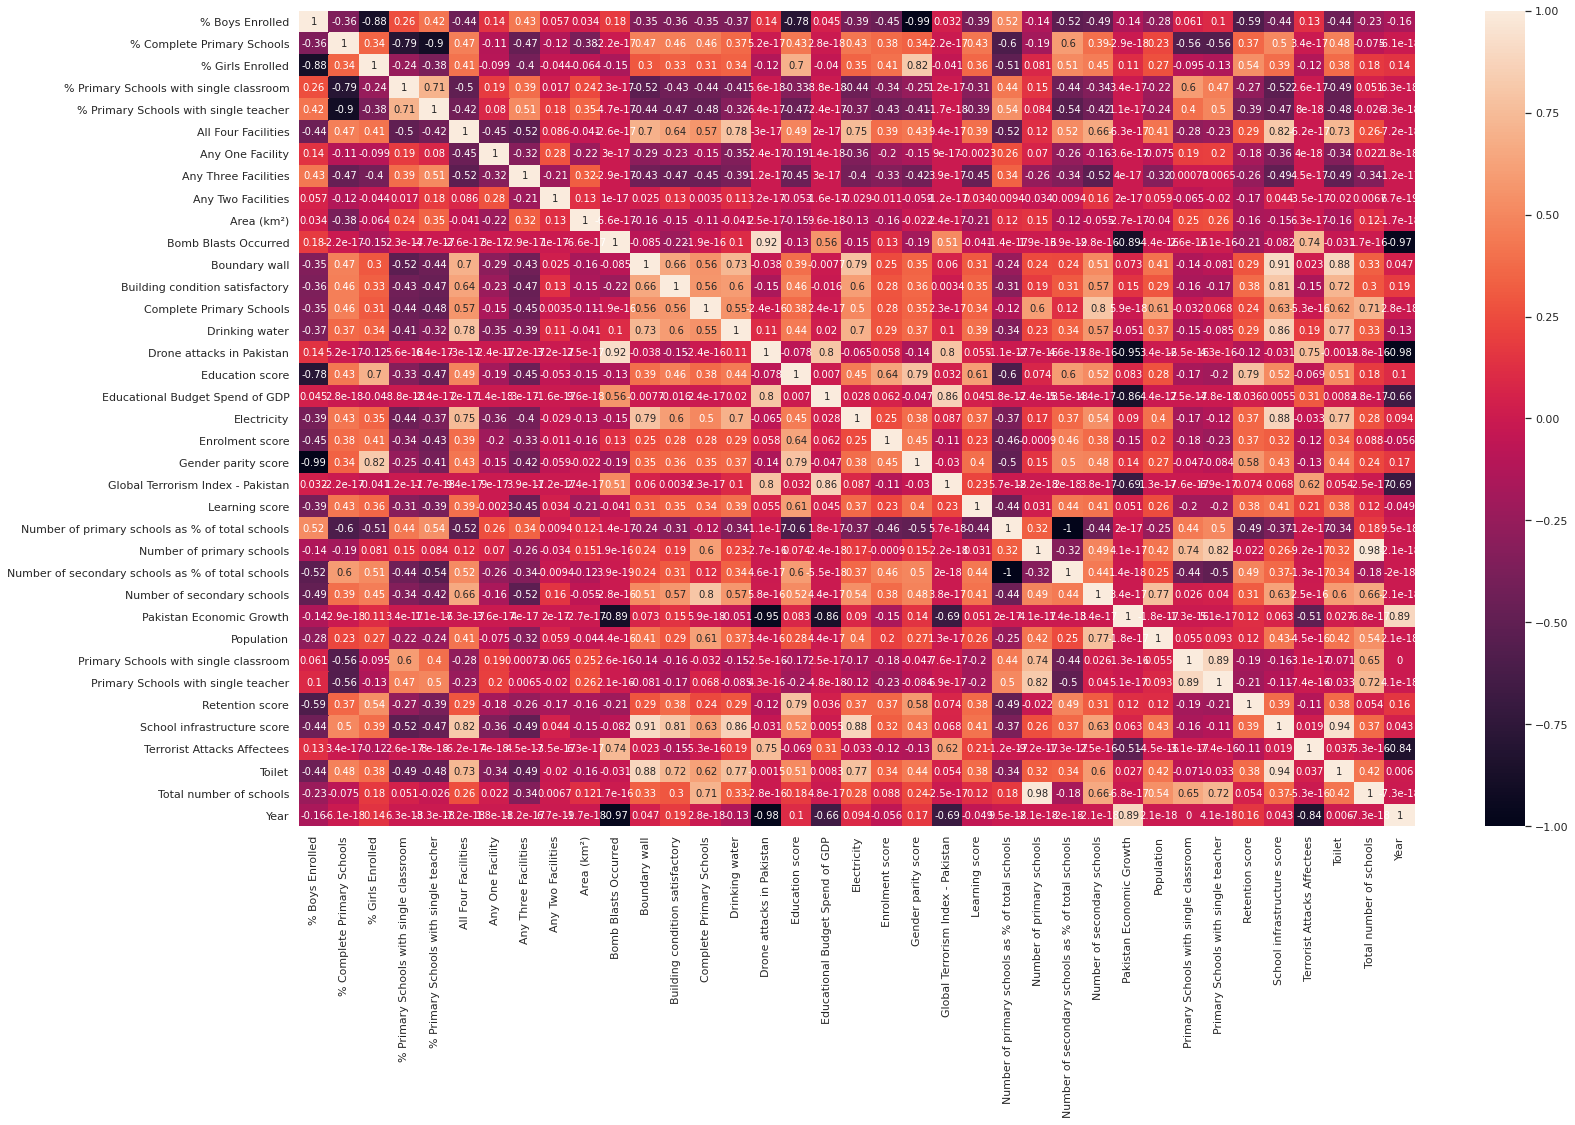

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))

corrMatrix = data.corr()
# print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

Due to large number of features, it is difficult to visualize the correlation matrix completely. Some observations that can be seen are:
1. Drone attacks have a high correlation with Educational Budget spend of GDP and Global Terrorism index
2.  Educational Budget spend of GDP has a high correlation with Global Terrorism index
3. Bomb blasts occurred has a high correlation with drone attacks rather than terrorism affectees 
4. An interesting fact can be seen is that retention score has low correlation with All 4 conditions, which points out to the fact that inspite of provision of good educational support, many children leave their education





Finding out numerical data distribution. 

Plotting the graphs help us visualizing which colummns are similar

In [ ]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
print(df_num.head())

   % Boys Enrolled  % Complete Primary Schools  % Girls Enrolled  \
0           0.5477                    0.936599            0.4523   
1           0.6250                    0.594203            0.3750   
2           0.8663                    0.939068            0.1337   
3           0.6077                    0.827225            0.3923   
4           0.6075                    0.592348            0.3925   

   % Primary Schools with single classroom  \
0                                 0.034582   
1                                 0.359903   
2                                 0.021505   
3                                 0.041885   
4                                 0.346966   

   % Primary Schools with single teacher  All Four Facilities  \
0                               0.028818               0.1706   
1                               0.045894               0.1525   
2                               0.039427               0.0535   
3                               0.130890              

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

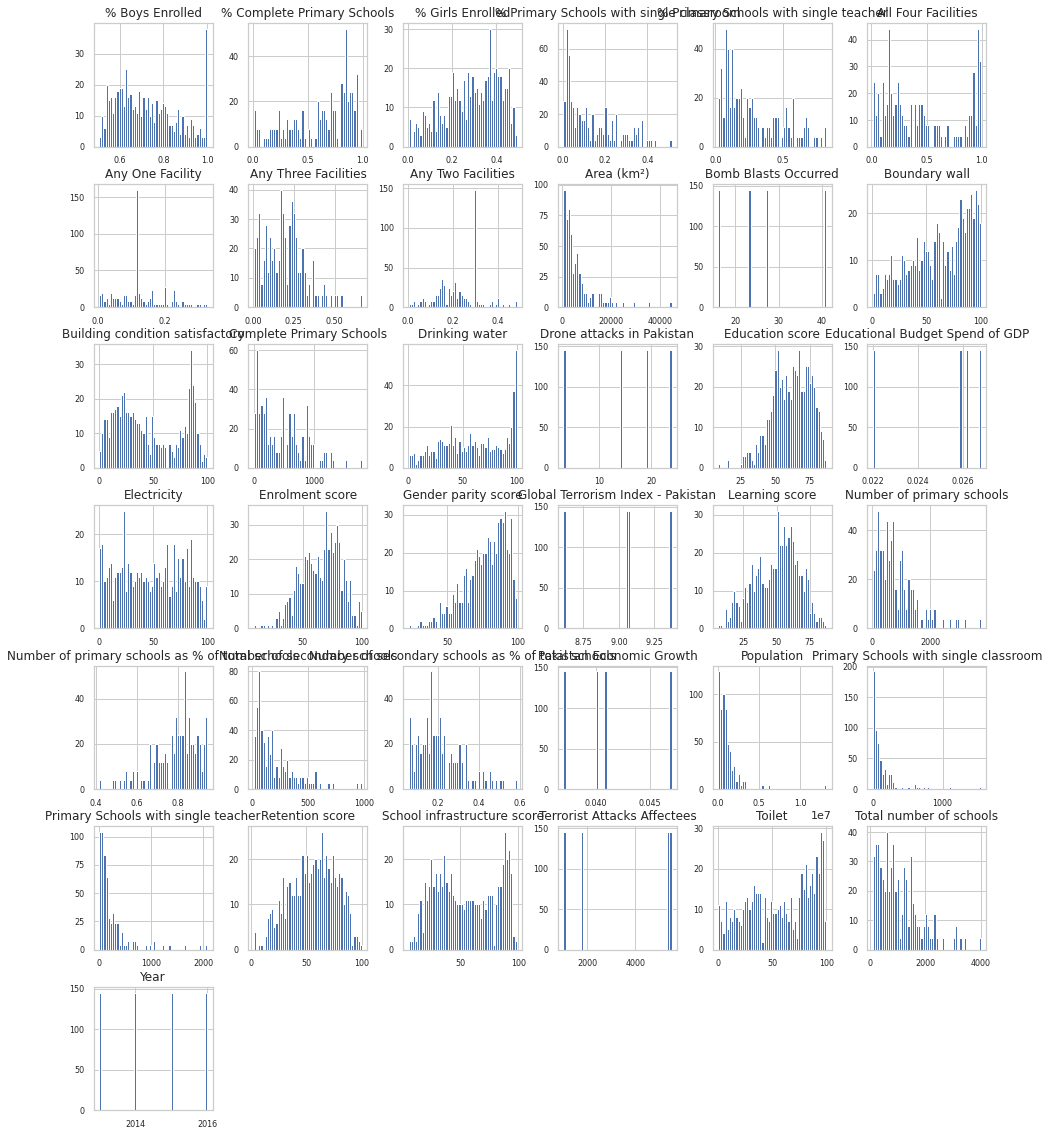

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Seperating the columns that have high correlation with retention score so as to know which factors contribute more

In [ ]:
df_num_corr = df_num.corr()['Retention score'][:-1] # -1 to ignore the Retention score column
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)#Descending sort
print("{} features are strongly correlated with Retention score. They are:\n{}".format(len(golden_features_list), golden_features_list))

5 features are strongly correlated with Retention score. They are:
Retention score        1.000000
Education score        0.787578
Gender parity score    0.580401
% Girls Enrolled       0.536915
% Boys Enrolled       -0.586845
Name: Retention score, dtype: float64


Education score has a high correlation with retention score
The remaining 4 columns above has a moderate correlation with retention score

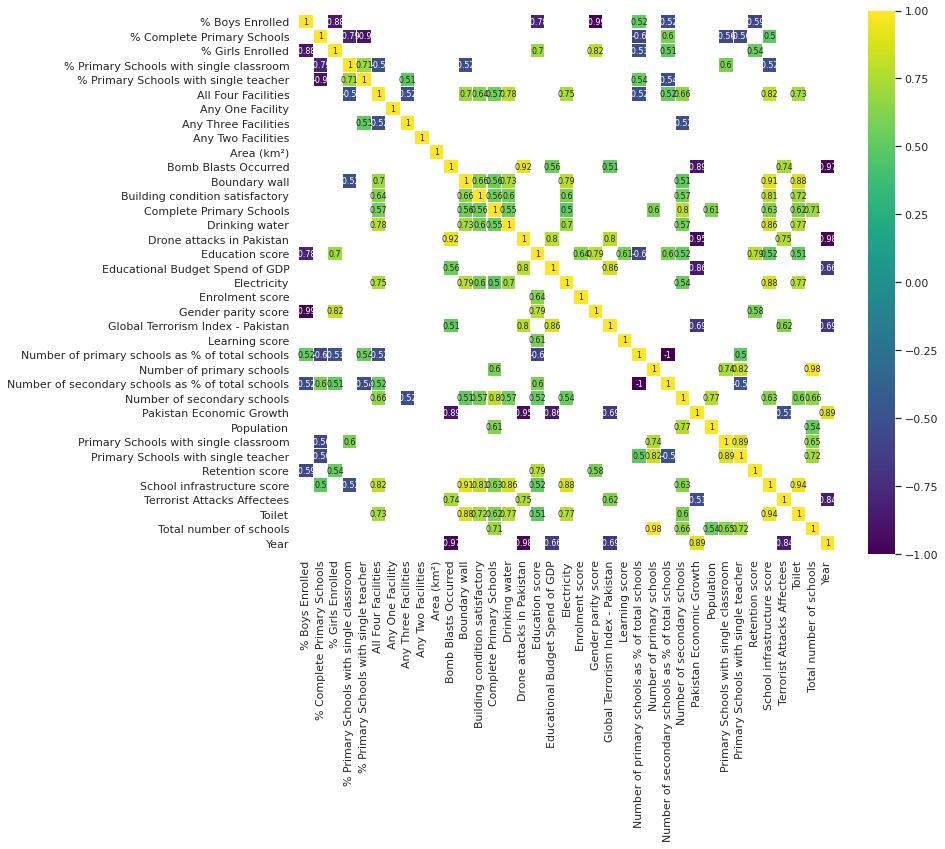

In [ ]:
corr = df_num.corr() # Finding correlations among columns after dropping saleprice
plt.figure(figsize=(12, 10))#adjusting image size

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Proving above observations through visualizations. Before starting visualization, we will normalize the data to bring it to similar scale

In [ ]:
data2=data.copy()
#Seperating the 'year' column
data2=data[Numerical[:-1]]

Normalizing data

In [ ]:

data2_column_maxes = data2.max()
data2_max = data2_column_maxes.max()
data2 = data2 / data2_max

# data2

In [ ]:
data3=data.copy()
data3[Numerical[:-1]]=data2.copy()
#Normalized data
data = data3
# data

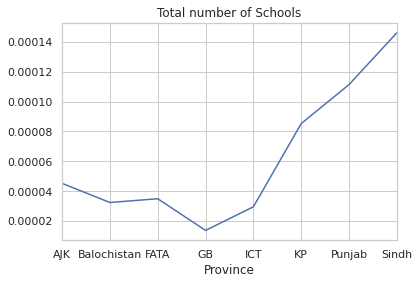

In [ ]:
data.groupby('Province')['Total number of schools'].mean().plot()
plt.title('Total number of Schools')
plt.show()


Sindh has the highest number of schools

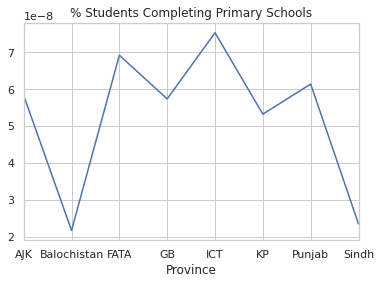

In [ ]:
data.groupby('Province')['% Complete Primary Schools'].mean().plot()
plt.title('% Students Completing Primary Schools')
plt.show()


Despite the fact that Sindh has the highest number of schools, many students dont complete Primary level education

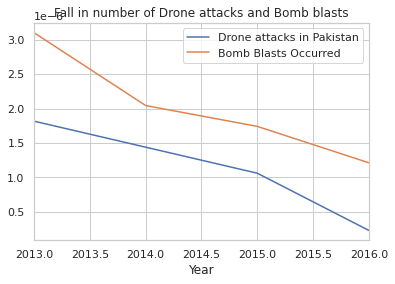

In [ ]:
data.groupby('Year')['Drone attacks in Pakistan','Bomb Blasts Occurred'].mean().plot()
plt.title('Fall in number of Drone attacks and Bomb blasts')
plt.show()


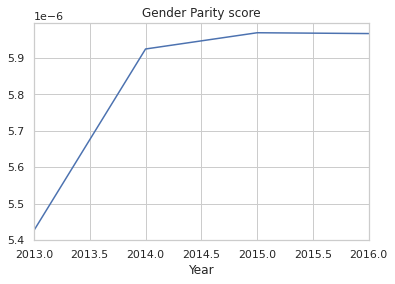

In [ ]:
data.groupby('Year')['Gender parity score'].mean().plot()
plt.title('Gender Parity score')
plt.show()

Gender parity score didnot increase as much as it did before since the year 2014

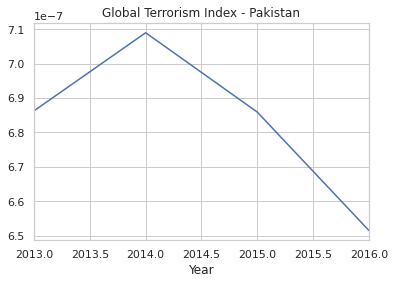

In [ ]:
data.groupby('Year')['Global Terrorism Index - Pakistan'].mean().plot()
plt.title('Global Terrorism Index - Pakistan')
plt.show()

A fall in Globat Terrorism Index is observed from 2014

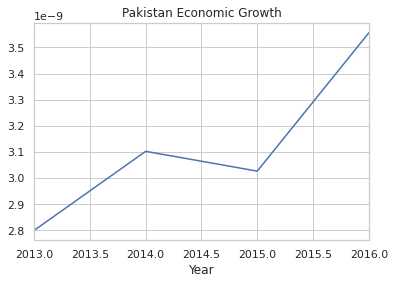

In [ ]:
data.groupby('Year')['Pakistan Economic Growth'].mean().plot()
plt.title('Pakistan Economic Growth')
plt.show()

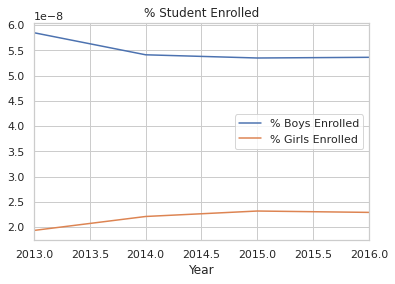

In [ ]:
data.groupby('Year')['% Boys Enrolled','% Girls Enrolled'].mean().plot()
plt.title('% Student Enrolled')
plt.show()

After 2014, a rise in female enrollment can be observed

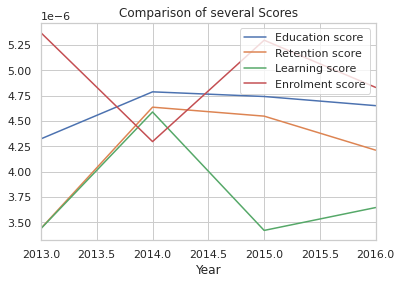

In [ ]:
data.groupby('Year')['Education score','Retention score', 'Learning score','Enrolment score'].mean().plot()
plt.title('Comparison of several Scores')
plt.show()